# Unit 5 - Financial Planning


In [26]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [20]:
# Fetch current BTC price
btc_prc = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_prc = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_prc * my_btc
my_eth_value = eth_prc * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45794.40
The current value of your 5.3 ETH is $13687.52


In [ ]:
api_key = os.getenv("QUANDL_API_KEY")
type(api_key)

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [52]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [53]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [54]:
# Format current date as ISO format
today = pd.Timestamp(str(date.today()), tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                            open    high     low    close   volume    open   
time                                                                         
2021-05-24 00:00:00-04:00  114.5  114.51  114.38  114.455  3756509  417.34   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-24 00:00:00-04:00  420.32  417.08  419.12  45499764

In [55]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.455
Current SPY closing price: $419.12


In [56]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20956.00
The current value of your 200 AGG shares is $22891.00


### Savings Health Analysis

In [57]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
data = {'amount':[my_btc_value + my_eth_value, my_spy_value + my_agg_value]}
df_savings = pd.DataFrame(data, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,59481.915
shares,43847.000


<AxesSubplot:ylabel='amount'>

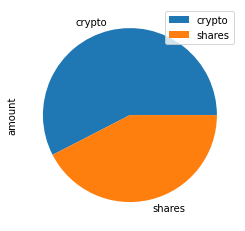

In [59]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', y = 'amount')

In [66]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your financial goal.')
else:
    print(f'you are ${emergency_fund - total_savings} away from your financial goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [119]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp(str(date(date.today().year - 5, date.today().month, date.today().day)), tz='America/New_York').isoformat()
end_date = pd.Timestamp(str(date.today()), tz='America/New_York').isoformat()

In [120]:
# Get 5 years' worth of historical data for SPY and AGG
# need to create a loop because only 1000 rows can be retrieved at a time

tickers = ["AGG", "SPY"]
timeframe = "1D"

# create a temporary start date j and loop 5 times to get 5 years of data
i = 1
df_stock_data = pd.DataFrame()

while i <= 5:
    j = pd.Timestamp(str(date(date.today().year - i, date.today().month, date.today().day)), tz='America/New_York').isoformat()
    k = pd.Timestamp(str(date(date.today().year - i + 1, date.today().month, date.today().day)), tz='America/New_York').isoformat()

# retrieve alpaca data
    temp = alpaca.get_barset(
        tickers,
        timeframe,
        start = j,
        end = k,
        limit = 1000
    ).df
    
# append the data 
    df_stock_data = df_stock_data.append(temp)
    i += 1

# Display sample data
df_stock_data = df_stock_data.sort_index()
df_stock_data


AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2016-05-25 00:00:00-04:00  110.54  110.55  110.3899  110.4759  2518214.0   
2016-05-26 00:00:00-04:00  110.64  110.73  110.5600  110.6300  1410096.0   
2016-05-27 00:00:00-04:00  110.68  110.70  110.4800  110.6100  2058598.0   
2016-05-31 00:00:00-04:00  110.41  110.76  110.3600  110.6600  3066570.0   
2016-06-01 00:00:00-04:00  110.59  110.65  110.4100  110.4300  2733076.0   
...                           ...     ...       ...       ...        ...   
2021-05-19 00:00:00-04:00  114.62  114.62  113.7900  113.9200  6576312.0   
2021-05-20 00:00:00-04:00  114.08  114.30  114.0800  114.2900  5646506.0   
2021-05-21 00:00:00-04:00  114.36  114.40  114.2300  114.3200  3350907.0   
2021-05-24 00:00:00-04:00  114.50  114.51  114.3800  114.4550  3756509.0   
2021-05-25 00:00:00-04:00  114.58  114.68  114.5600  114.6700  1903846.0   

                              SPY                                        
                             open     high      low     close    volume  
time                                                                     
2016-05-25 00:00:00-04:00  208.67  209.770  208.620  209.2200  59678561  
2016-05-26 00:00:00-04:00  209.44  209.710  208.970  209.3264  41187181  
2016-05-27 00:00:00-04:00  209.53  210.210  209.470  210.2000  48878450  
2016-05-31 00:00:00-04:00  210.55  210.690  209.180  209.9000  74321735  
2016-06-01 00:00:00-04:00  209.12  210.480  208.890  210.2700  57038888  
...                           ...      ...      ...       ...       ...  
2021-05-19 00:00:00-04:00  406.92  411.050  405.335  410.9000  94165741  
2021-05-20 00:00:00-04:00  411.80  416.625  411.670  415.2400  69408898  
2021-05-21 00:00:00-04:00  416.87  418.200  414.450  414.9500  66355670  
2021-05-24 00:00:00-04:00  417.34  420.320  417.080  419.1200  45510571  
2021-05-25 00:00:00-04:00  420.33  420.710  417.940  419.0600  28874653  

[1261 rows x 10 columns]

In [121]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [122]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2016-05-25 00:00:00-04:00  110.54  110.55  110.3899  110.4759  2518214.0   
2016-05-26 00:00:00-04:00  110.64  110.73  110.5600  110.6300  1410096.0   
2016-05-27 00:00:00-04:00  110.68  110.70  110.4800  110.6100  2058598.0   
2016-05-31 00:00:00-04:00  110.41  110.76  110.3600  110.6600  3066570.0   
2016-06-01 00:00:00-04:00  110.59  110.65  110.4100  110.4300  2733076.0   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2016-05-25 00:00:00-04:00          NaN  208.67  209.77  208.62  209.2200   
2016-05-26 00:00:00-04:00     0.001395  209.44  209.71  208.97  209.3264   
2016-05-27 00:00:00-04:00    -0.000181  209.53  210.21  209.47  210.2000   
2016-05-31 00:00:00-04:00     0.000452  210.55  210.69  209.18  209.9000   
2016-06-01 00:00:00-04:00    -0.002078  209.12  210.48  208.89  210.2700   

                                                  
                             volume daily_return  
time                                              
2016-05-25 00:00:00-04:00  59678561          NaN  
2016-05-26 00:00:00-04:00  41187181     0.000509  
2016-05-27 00:00:00-04:00  48878450     0.004173  
2016-05-31 00:00:00-04:00  74321735    -0.001427  
2016-06-01 00:00:00-04:00  57038888     0.001763

In [123]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999349,1.002882,1.006681,1.005584,1.005885,1.007619,0.998768,0.992097,1.000654,1.000654,...,1.002846,1.013907,0.993905,0.996816,1.004520,0.992221,0.998882,0.985249,1.005365,1.005492
2,0.988871,1.004529,1.007734,0.999980,1.007368,1.007178,0.995485,0.989387,0.995750,1.004612,...,1.018302,1.016327,0.999182,0.997612,1.013173,0.994813,1.004644,0.996047,1.009964,0.991657
3,0.992394,1.004096,1.013300,0.997316,1.005643,1.011783,0.993128,0.978610,0.991620,0.999986,...,1.029704,1.019845,0.993963,1.000475,1.012271,1.000651,0.997304,1.004782,1.025158,0.999097
4,0.996564,1.014048,1.009080,1.005237,1.007965,1.028264,0.988171,0.970424,0.980871,0.999151,...,1.025637,1.016099,0.996784,1.004973,1.004676,1.000491,0.997253,0.998546,1.036028,1.004657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.821324,15.427656,13.235568,7.372889,7.692115,16.353596,13.755777,31.001372,9.219386,23.740894,...,26.490321,18.310885,22.623555,37.234949,9.336362,12.165405,60.826062,5.849681,11.583061,17.196537
7557,22.221972,15.243961,13.155567,7.386245,7.615675,16.284144,13.687941,31.010733,9.391609,23.801298,...,26.576194,18.202560,22.647545,37.655348,9.377614,12.279740,60.785273,5.905149,11.452955,17.335758
7558,22.202807,15.192380,13.100395,7.387345,7.657954,16.296200,13.554602,30.850514,9.404580,24.085046,...,26.392358,17.923535,22.822414,37.578254,9.462129,12.191113,60.807719,5.907634,11.409904,17.418592
7559,22.500256,14.949676,13.078551,7.458117,7.600172,16.494049,13.545325,30.668168,9.414944,24.147329,...,26.350659,17.952590,22.695016,37.849089,9.450176,12.329181,60.008589,5.972485,11.467816,17.554993


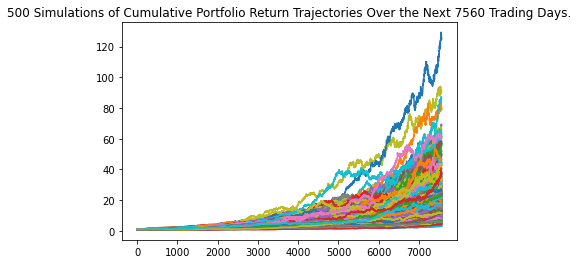

In [124]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

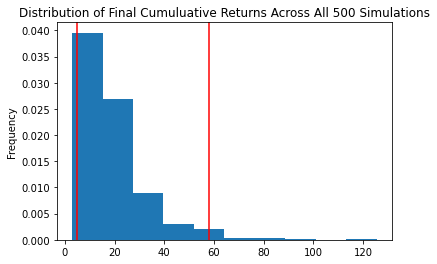

In [125]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [126]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             19.310702
std              14.011201
min               2.978143
25%              10.465322
50%              15.530983
75%              23.891356
max             125.341349
95% CI Lower      4.755708
95% CI Upper     58.094912
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [127]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95114.16 and $1161898.25


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [128]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $142671.24 and $1742847.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [129]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [130]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001140,0.989769,1.005639,0.996836,1.001148,1.005104,0.987965,1.000574,0.990096,1.004792,...,0.992411,1.004712,0.994152,1.017016,0.997033,0.995811,0.995169,1.003975,0.998856,0.989944
2,0.999150,0.989454,0.995597,0.988920,1.001847,1.007144,0.991608,0.993909,0.989859,1.011547,...,0.998057,1.008803,0.997979,1.011573,1.007464,0.984351,0.981038,0.999515,0.994325,0.980259
3,0.994451,0.998400,1.004693,0.981493,1.009062,1.016932,0.977474,0.978993,0.991016,1.007722,...,0.997000,1.004259,0.994551,1.024840,0.998910,0.991633,0.986864,0.991526,0.990156,0.989550
4,0.996148,0.988060,1.005883,0.971680,1.018852,1.026742,0.967231,0.975676,0.988763,1.010392,...,0.994895,0.999524,0.996157,1.028632,1.000396,1.003388,0.980766,0.994196,0.997123,0.992666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.708199,1.648558,1.956509,0.985604,1.284347,1.237027,1.257778,1.586009,1.478822,1.574505,...,1.829228,1.697076,1.372311,1.590287,1.951046,1.932830,1.416295,1.865569,1.080658,1.822002
1257,1.737096,1.640019,1.957180,0.982999,1.308805,1.246080,1.260427,1.588093,1.481437,1.570405,...,1.816976,1.679393,1.379084,1.593617,1.954525,1.957402,1.414962,1.846702,1.077325,1.835357
1258,1.733053,1.640364,1.961272,0.982006,1.315090,1.241804,1.251255,1.610868,1.500438,1.576743,...,1.817635,1.677329,1.371886,1.604379,1.956989,1.962680,1.423621,1.854474,1.084480,1.840214
1259,1.734825,1.628837,1.961638,0.975234,1.314847,1.244734,1.247195,1.617646,1.502461,1.575452,...,1.809482,1.679989,1.366422,1.591976,1.967790,1.969973,1.411578,1.859320,1.085338,1.830708


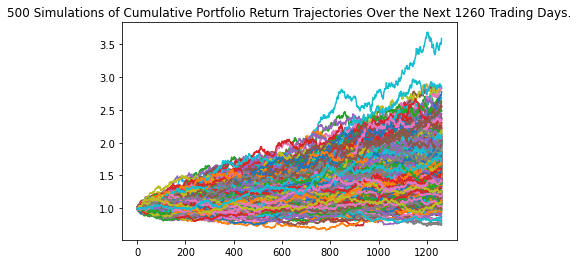

In [131]:
# Plot simulation outcomes
line_plot = MC_5year.plot_simulation()

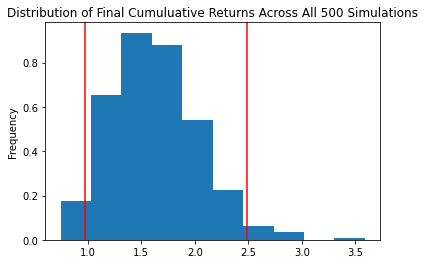

In [132]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()

In [133]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.628354
std               0.408962
min               0.744933
25%               1.338781
50%               1.597113
75%               1.878930
max               3.589484
95% CI Lower      0.969984
95% CI Upper      2.490939
Name: 1260, dtype: float64


In [134]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19399.69 and $49818.77


### Ten Years Retirement Option

In [135]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [136]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011109,1.006089,0.981022,1.004095,0.992843,1.004192,1.005173,0.999242,1.008131,0.997764,...,1.001186,0.999136,1.004538,1.005419,1.004588,0.997101,1.008357,1.001781,1.018166,1.006663
2,1.016506,1.006258,0.986679,1.012821,0.999515,1.002375,1.029004,1.013458,1.013098,1.002728,...,0.987880,0.997192,1.003305,0.993188,0.991610,0.999356,1.026157,1.007947,1.030154,1.011641
3,1.018792,1.005458,0.977091,1.016285,1.000283,0.995990,1.043821,1.009757,1.016665,1.011022,...,0.989288,0.990878,1.000287,1.001861,0.986964,1.006676,1.036464,1.007035,1.052285,1.030004
4,1.018373,1.018534,0.979538,0.990375,1.008989,0.993336,1.031614,1.005796,1.027039,1.009092,...,0.977812,0.987889,1.004395,0.996008,0.979457,1.004377,1.028477,0.994323,1.042492,1.035182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.009669,2.336055,4.036497,1.383210,3.158573,3.273723,2.369579,1.542766,2.165761,3.534135,...,1.725399,1.640771,1.454010,2.268357,1.391362,2.479350,2.878002,3.273087,1.660006,2.500906
2517,2.022826,2.332701,4.047164,1.390344,3.158015,3.241317,2.404174,1.554180,2.169228,3.520101,...,1.724494,1.663349,1.445301,2.259642,1.405150,2.471087,2.891262,3.292051,1.666887,2.535124
2518,2.017287,2.325806,4.027817,1.387227,3.180431,3.229627,2.414257,1.549756,2.169767,3.539823,...,1.721833,1.653500,1.451292,2.259366,1.421228,2.460283,2.884296,3.348010,1.672609,2.535600
2519,2.031740,2.310160,4.002397,1.399896,3.184458,3.242743,2.383763,1.545196,2.151143,3.527188,...,1.731264,1.653717,1.451754,2.242651,1.396767,2.433255,2.910083,3.354352,1.669149,2.561112


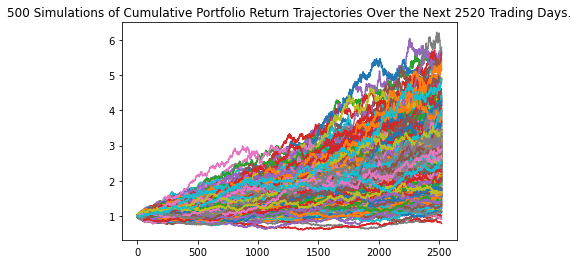

In [137]:
# Plot simulation outcomes
line_plot = MC_10year.plot_simulation()

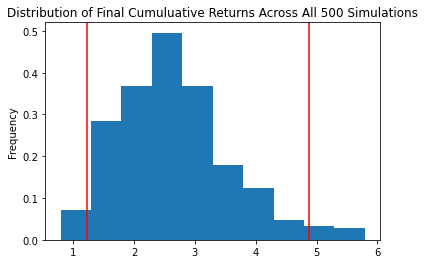

In [138]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10year.plot_distribution()

In [139]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.657653
std               0.910876
min               0.791389
25%               2.027665
50%               2.530157
75%               3.155786
max               5.793406
95% CI Lower      1.224008
95% CI Upper      4.870541
Name: 2520, dtype: float64


In [140]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24480.16 and $97410.82
